In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [135]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [137]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [138]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


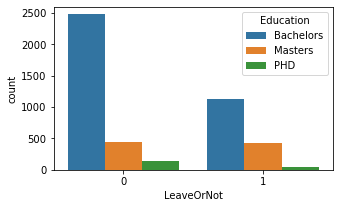

In [139]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df, x='LeaveOrNot', hue='Education')
plt.show()

<h4>The percentage of leaving or not is the same</h4>

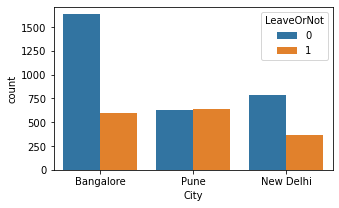

In [140]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data = df, x='City', hue='LeaveOrNot')
plt.show()

<h4>Less people in Banglore leave</h4>

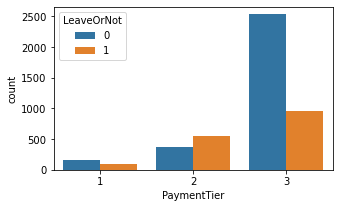

In [141]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df,x='PaymentTier',hue='LeaveOrNot')
plt.show()

<h4>People with the Payment tier 2 have a higher chance of leaving</h4>

In [142]:
stringData = df[['Education','City']]

In [143]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df['EverBenched'].replace(['No','Yes'],[0,1],inplace=True)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,1,0,0,0
1,Bachelors,2013,Pune,1,28,0,0,3,1
2,Bachelors,2014,New Delhi,3,38,0,0,2,0
3,Masters,2016,Bangalore,3,27,1,0,5,1
4,Masters,2017,Pune,3,24,1,1,2,1


In [152]:
X_1 = df.drop('LeaveOrNot', axis=1)
y_1 = df['LeaveOrNot']

In [153]:
X_1 = pd.get_dummies(df, columns = X_1.columns, drop_first=True)

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=1999)

In [155]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()

In [156]:
stds.fit(X_train)
X_train = stds.transform(X_train)
X_test = stds.transform(X_test)

In [157]:
stds

StandardScaler()

In [158]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [159]:
predictY_train1 = lg.predict(X_train)
predictY_test1 = lg.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score

print('Logistic Regression trainning accuracy: ',accuracy_score(y_train, predictY_train1)*100)
print('Logistic Regression test accuracy: ',accuracy_score(y_test, predictY_test1)*100)

Logistic Regression trainning accuracy:  100.0
Logistic Regression test accuracy:  100.0


C:\Users\omar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


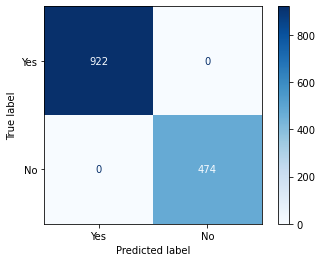

In [161]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(lg, X_test, y_test, display_labels = ['Yes','No'], cmap='Blues')

**Logistic Regression With 100% accuracy**

In [162]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_1, y_1, test_size=0.3,
                                                    random_state=1999)

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [165]:
predictY_train2 = knn.predict(X_train)
predictY_test2 = knn.predict(X_test)

In [166]:
print('k-nearest neighbors trainning accuracy: ',accuracy_score(y_train, predictY_train2)*100)
print('k-nearest neighbors accuracy: ',accuracy_score(y_test, predictY_test2)*100)

k-nearest neighbors trainning accuracy:  93.89008289837274
k-nearest neighbors accuracy:  90.83094555873924


C:\Users\omar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


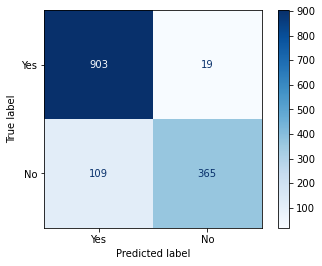

In [167]:
fig2 = plot_confusion_matrix(knn, X_test, y_test, display_labels = ['Yes','No'], cmap='Blues')

**KNN Classifier With 90% Accuracy**

In [91]:
#X_train3, X_test3, y_train3, y_test3 = train_test_split(X_1, y_1, test_size=0.3,
                                                    random_state=1999)

In [168]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [169]:
predictY_train3 = rfc.predict(X_train)
predictY_test3 = rfc.predict(X_test)

In [170]:
print('Random Forest Classifier trainning accuracy: ',accuracy_score(y_train, predictY_train3)*100)
print('Random Forest Classifier accuracy: ',accuracy_score(y_test, predictY_test3)*100)

Random Forest Classifier trainning accuracy:  100.0
Random Forest Classifier accuracy:  100.0


C:\Users\omar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


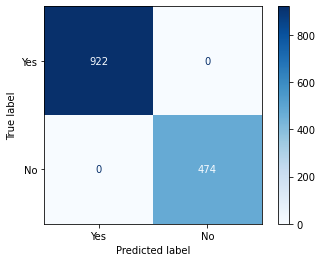

In [171]:
fig3 = plot_confusion_matrix(rfc, X_test, y_test, display_labels = ['Yes','No'], cmap='Blues')

**Random Forest With 100% accuracy**

In [113]:
#X_train4, X_test4, y_train4, y_test4 = train_test_split(X_1, y_1, test_size=0.3,
                                                    random_state=1999)

In [172]:
from sklearn.tree import DecisionTreeClassifier
dsc = DecisionTreeClassifier()
dsc.fit(X_train, y_train)

DecisionTreeClassifier()

In [173]:
predictY_train4 = dsc.predict(X_train)
predictY_test4 = dsc.predict(X_test)

In [174]:
print('Decision Tree Classifier trainning accuracy: ',accuracy_score(y_train, predictY_train4)*100)
print('Decision Tree Classifier accuracy: ',accuracy_score(y_test, predictY_test4)*100)

Decision Tree Classifier trainning accuracy:  100.0
Decision Tree Classifier accuracy:  100.0


C:\Users\omar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


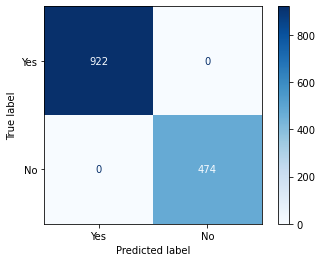

In [175]:
fig4 = plot_confusion_matrix(dsc, X_test, y_test, display_labels = ['Yes','No'], cmap='Blues')

**Decision Tree with 100% Accuracy**

In [122]:
#X_train5, X_test5, y_train5, y_test5 = train_test_split(X_1, y_1, test_size=0.3,
                                                    random_state=1999)

In [176]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [177]:
predictY_train5 = gnb.predict(X_train)
predictY_test5 = gnb.predict(X_test)

In [180]:
print('Naive Bayes Classifier trainning accuracy: ',accuracy_score(y_train, predictY_train5)*100)
print('Naive Bayes Classifier accuracy: ',accuracy_score(y_test, predictY_test5)*100)

Naive Bayes Classifier trainning accuracy:  100.0
Naive Bayes Classifier accuracy:  99.8567335243553


C:\Users\omar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


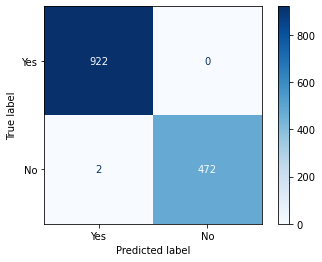

In [181]:
fig5 = plot_confusion_matrix(gnb, X_test, y_test, display_labels = ['Yes','No'], cmap='Blues')

**Naive Bayes with 99% Accuracy**

In [185]:
import pickle

In [186]:
filename = 'Best_model.sav'
pickle.dump(dsc, open(filename, 'wb'))